<a href="https://colab.research.google.com/github/caumannerman/2021_cau_oss_hackathon/blob/main/hackathon_team15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 해커톤 진행 주의사항**

**1)  개발 관련 주의사항**
*   [1. 초기 환경 설정]은 절대 수정하지 말 것
*   모든 구현은 [2. 데이터 전처리] 및 [3.모델 생성]에서만 진행
*   [4. 모델 저장]에서 team_name 변수 변경 (예.`team_name = 'team01'`)
 *    트레이닝 중간에 checkpoint를 활용하여 모델을 저장한 경우에도 파일 이름 양식 통일 필수
*   Colab 사용중 실수로 데이터 손실이 발생할 수도 있으니 중간 결과값을 github에 업로드 
 *    "런타임->모든 런타임 재설정"은 절대 누르지 말 것 (저장한 모델 데이터가 모두 삭제됨)
*   효율적인 구현 및 테스팅을 위해 GPU 가속 기능 활성화
 *    "런타임 -> 런타임 유형변경 -> 하드웨어 가속기 -> GPU 설정"
*   주석을 최대한 자세히 작성
*   Keras API 관련하여 [Keras Documentation](https://keras.io/) 참조

**2) 제출 관련 주의사항**
*  제출물
 *  소스코드 (hackathon_teamXX.ipynb)
 *  컴파일된 모델 파일 (model_entire_teamXX.h5)
 *  모델 발표 자료 
* 제출 기한: **오후 6시 (단, 발표자료는 12시)**
* 제출 방법: [GitHub README](https://github.com/cauosshackathonta/2021_cau_oss_hackathon/) 참조

 
**3) 평가 관련 주의사항**
*  모델 성능 = 두개의 테스트 데이터 셋 분류 정확도에 대한 weighted sum
 *  model.evaluate(x_test1, y_test1) + model.evaluate(x_test2, y_test2) * 2
*  제출된 모델들의 테스트 데이터 셋 분류 정확도를 기준으로 수상작 결정
*  수상 후보들에 대해서는 소스코드를 기반으로 모델 재검증 
 
**4) 수상 실격 사유**
*  유사한 소스코드 or 알고리즘이 적발될 경우
*  소스코드와 제출된 모델이 상이한 경우
*  개발 관련 주의사항을 지키지 않은 경우
 *  예: [초기 환경 설정]을 수정한 경우
*  데이터 셋을 변조한 경우
 *  예: 테스트 데이터 셋을 트레이닝 데이터 셋에 포함하여 모델 생성
 *  단, tensorflow.data 및 dataset API를 사용하기 위해 변경하는 것은 허용. 이 경우, model evaluation 파트도 해당 API를 쓰도록 변경  
*  주석이 소스코드와 맞지 않거나 미비할 경우






# **1. 초기 환경 설정**



In [3]:
# tensorflow와 tf.keras 및 관련 라이브러리 임포트
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.utils import np_utils

# 데이터셋 로드 (Training dataset: CIFAR10, test dataset: CIFAR10 & CIFAR10의 변형)
(x_train, y_train), (x_test1, y_test1) = keras.datasets.cifar10.load_data()
print(x_train.shape, x_test1.shape)
test_ds2 = tfds.load('cifar10_1/v6', split='test', shuffle_files=False, batch_size=-1)
test_ds2 = tfds.as_numpy(test_ds2)
x_test2, y_test2 = test_ds2['image'], test_ds2['label']

#분류를 위해 클래스 벡터를 바이너리 매트릭스로 변환
y_train = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test1)
y_test2 = np_utils.to_categorical(y_test2)

print(y_train.shape, y_test1.shape, y_test2.shape)
# 총 클래스 개수
num_classes = y_train.shape[1]
input_shape = x_train.shape[1:]
print(num_classes, input_shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


(50000, 10) (10000, 10) (2000, 10)
10 (32, 32, 3)


# **2. 데이터 전처리**



[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


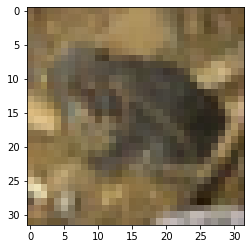

In [6]:
# 필요한 라이브러리 import
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
# 이미지 출력해봄
now = 23
print( y_train[now])
plt.imshow(x_train[now])
plt.show()


<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


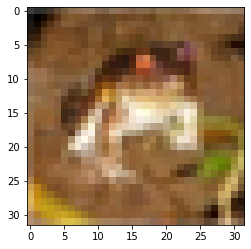

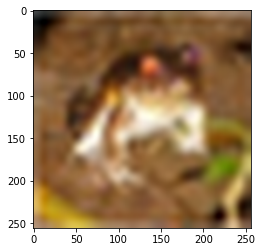

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(256, 256, 3)


In [85]:
# numpy 사진을 PIL로 바꾸어 사이즈 변경 


print(type(x_train[0]))
pil_image=Image.fromarray(x_train[0])

print(type(pil_image))
pil_image.show()

plt.imshow(pil_image)
plt.show()


# PIL 모듈을 이용하여 이미지 사이즈 변경 
new_width  = 256
new_height = 256

img = pil_image.resize((new_width, new_height), Image.ANTIALIAS)


plt.imshow(img)
plt.show()
print(type(img))
tt = np.array(img)
print(type(tt))
print(tt.shape)

In [7]:
print(x_train.shape, x_test1.shape, x_test2.shape)

print(y_train.shape, y_test1.shape, y_test2.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (2000, 32, 32, 3)
(50000, 10) (10000, 10) (2000, 10)


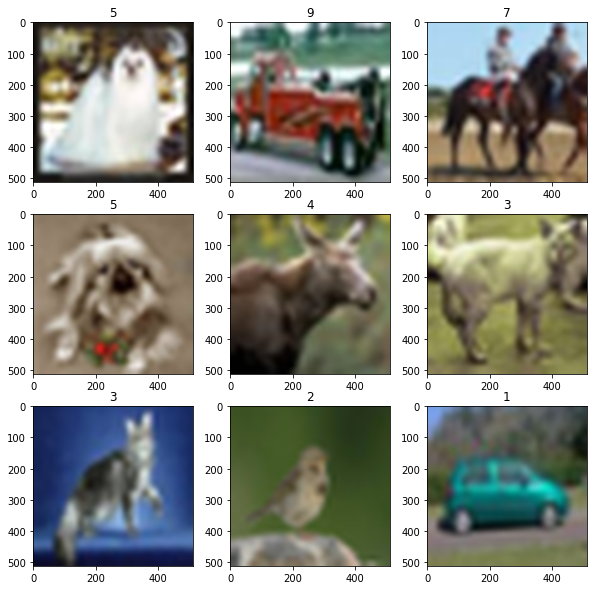

In [83]:
# test2 데이터 보는 부분 

plt.figure(figsize = (10,10))
i = 0

for i in range(1,10):
  
  plt.subplot(int('33'+str(i)))
  nummm = i+360
  plt.imshow(  Image.fromarray(x_test2[nummm]).resize((new_width, new_height), Image.ANTIALIAS) )
  plt.title( np.where(y_test2[nummm] == 1)[0][0] )

plt.show()

In [31]:
# 이미지 사이즈를 조정하여 ( 크게 ) , train셋에 추가
import copy
# PIL 모듈을 이용하여 이미지 사이즈 변경 
new_width  = 256
new_height = 256

new_train = np.asarray(Image.fromarray(x_train[0]).resize((new_width, new_height), Image.ANTIALIAS), dtype='uint8').reshape((1,256,256,3))

print(new_train.shape)
for i in range(1,50000):
    print(i)
    #print(np.array(Image.fromarray(x_train[i]).resize((new_width, new_height), Image.ANTIALIAS)).shape)
    #plt.imshow(np.array(Image.fromarray(x_train[i]).resize((new_width, new_height), Image.ANTIALIAS)).reshape(1,new_width, new_height,3))
    new_train = np.vstack( (new_train,np.asarray(Image.fromarray(x_train[i]).resize((new_width, new_height), Image.ANTIALIAS), dtype='uint8').reshape((1,256,256,3))))

print(new_train.shape)
np.savez_compressed()
plt.imshow(new_train[2])
plt.show()




(1, 256, 256, 3)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273

KeyboardInterrupt: ignored

In [81]:
# 데이터 전처리 (예: normalization)
# 원본 데이터와 전처리 후 데이터를 구분하기 위해, 변수명 x_train_after, x_test1_after, x_test2_after를 변경하지 말 것
x_train_after = x_train / 255.0
x_test1_after = x_test1 / 255.0
x_test2_after = x_test2 / 255.0

# **3. 모델 생성**

In [84]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',
                input_shape=input_shape, activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3),padding='same', activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten(input_shape=input_shape))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(num_classes, activation=tf.nn.softmax))

# 모델 컴파일
# optimizer: 모델을 업데이트 하는 방식
# loss: 모델의 정확도를 판단하는 방식
# metrics: 트레이닝 및 테스팅 성능 모니터링을 위한 평가지표
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 체크포인트 생성
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_entire_best.h5', monitor='val_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')

# 모델 트레이닝
# batch_size: 전체 데이터셋 중 몇개씩 학습시킬 것인지
# epoch: 학습에 전체 데이터셋이 총 몇번 이용될 것인지
# shuffle: 학습전에 트레이닝 데이터셋을 랜덤하게 섞을 것인지
# validation_data: 중간 성능 검증에 사용할 data set (x_test1_after, x_test2_after, 혹은 둘을 merge해서 사용)
model.fit(x_train_after, y_train, batch_size = 128, epochs = 100, shuffle=True, callbacks=[cp_callback], validation_data=(x_test2_after, y_test2))

Epoch 1/100
391/391 [==============================] - 10s 23ms/step - loss: 1.6405 - accuracy: 0.3996 - val_loss: 1.5755 - val_accuracy: 0.4250

Epoch 00001: val_accuracy improved from -inf to 0.42500, saving model to /content/checkpoint_entire_best.h5
Epoch 2/100
391/391 [==============================] - 9s 23ms/step - loss: 1.2237 - accuracy: 0.5616 - val_loss: 1.3928 - val_accuracy: 0.5125

Epoch 00002: val_accuracy improved from 0.42500 to 0.51250, saving model to /content/checkpoint_entire_best.h5
Epoch 3/100
391/391 [==============================] - 9s 23ms/step - loss: 1.0404 - accuracy: 0.6311 - val_loss: 1.2629 - val_accuracy: 0.5550

Epoch 00003: val_accuracy improved from 0.51250 to 0.55500, saving model to /content/checkpoint_entire_best.h5
Epoch 4/100
391/391 [==============================] - 9s 23ms/step - loss: 0.9357 - accuracy: 0.6703 - val_loss: 1.2697 - val_accuracy: 0.5625

Epoch 00004: val_accuracy improved from 0.55500 to 0.56250, saving model to /content/chec

KeyboardInterrupt: ignored

# **4. 모델 저장**

In [ ]:
save_path = '/content/'
team_name = 'teamXX'

# 트레이닝된 전체 모델을 저장합니다.
model.save(save_path +  'model_entire_'+ team_name + '.h5')

# **5. 모델 로드 및 평가**

In [ ]:
save_path = '/content/'
team_name = 'teamXX'

model = keras.models.load_model(save_path + 'model_entire_' + team_name + '.h5')

model.evaluate(x_test1_after, y_test1)
model.evaluate(x_test2_after, y_test2)
##